In [ ]:
# Import prerequisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
# Load data as data frame
cars = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The mtcars dataset is a built-in R dataset featuring 32 observations (1973 - 74 car models) and 11 variables related to automobile design and performance.

**Key Data Details**

Observations: 32 (various car models)

Variables: 11

Origin: 1974 Motor Trend US Magazine

**Variables**

* mpg: Miles/(US) gallon
* cyl: Number of cylinders
* disp: Displacement in cubic inches
* hp: Gross horsepower
* drat: Driveshaft ratio
* wt: Weight in 1000s of lbs.
* qsec: Quarter mile time
* vs: Engine shape (0 = V-shaped, 1 = straight)
* am: Transmission (0 = automatic, 1 = manual)
* gear: Number of forward gears
* carb: Number of carburetors

In [ ]:
# split predictors and outcome
X = cars.drop(['mpg'], axis=1)
y = cars['mpg']

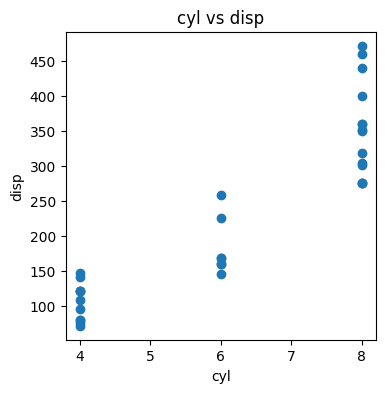

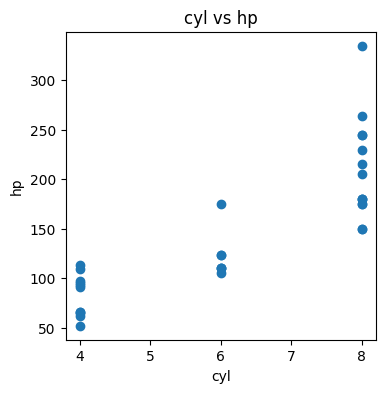

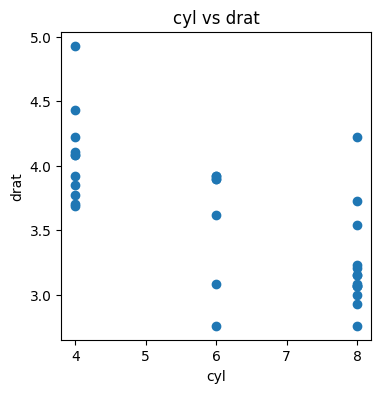

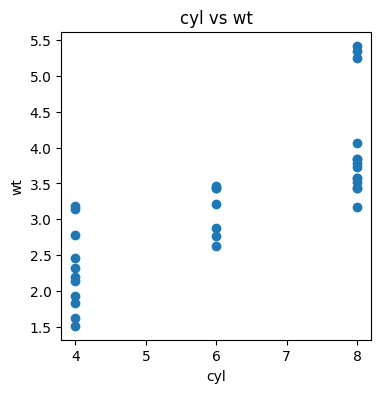

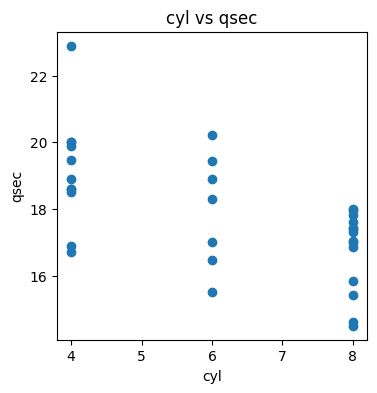

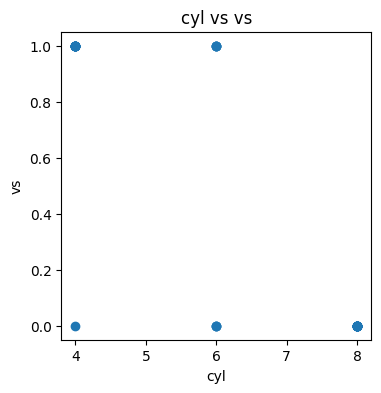

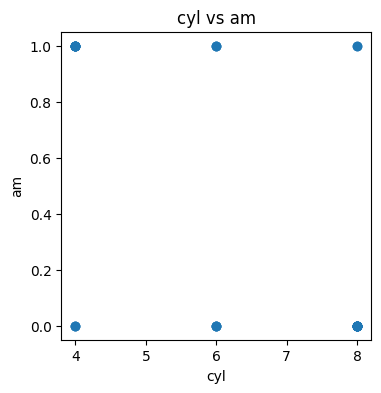

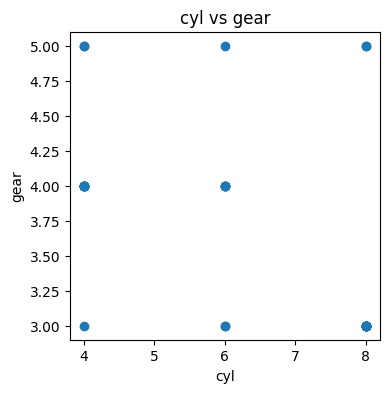

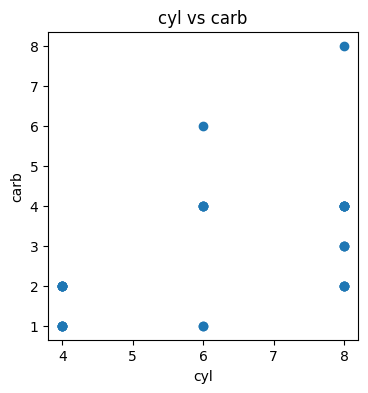

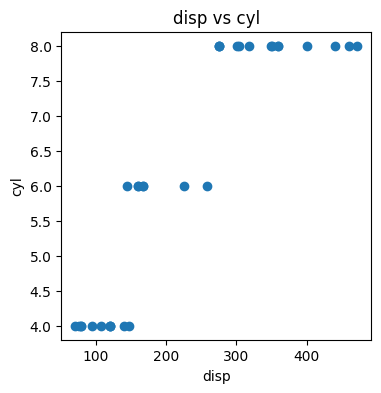

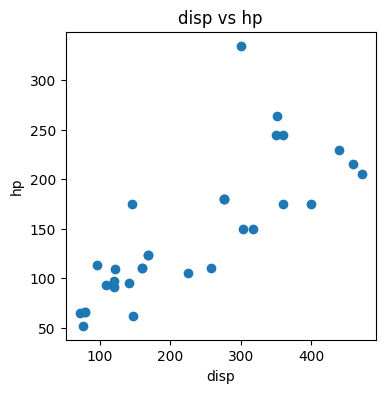

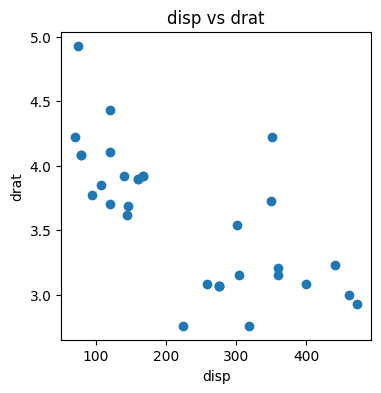

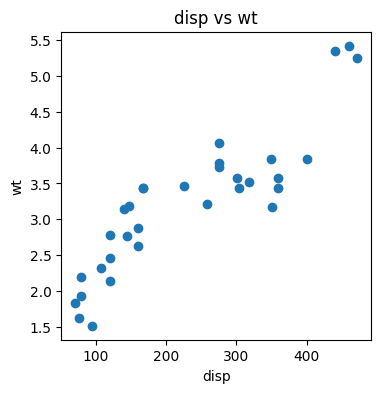

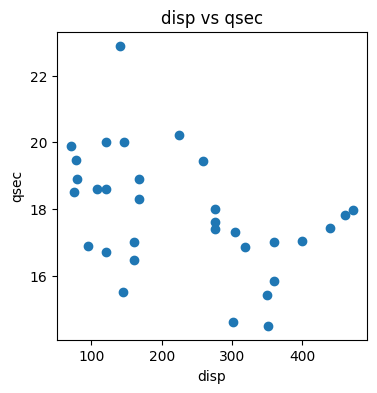

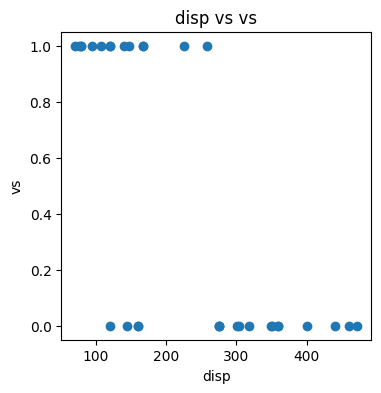

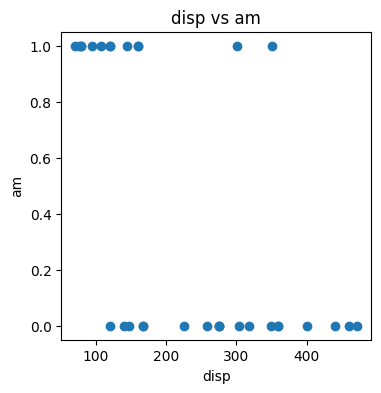

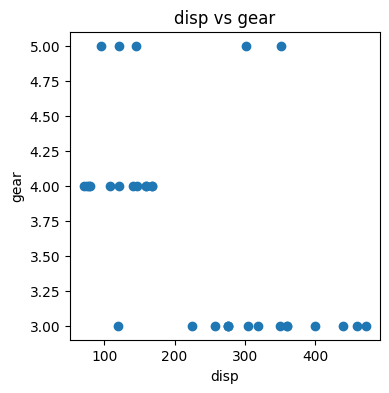

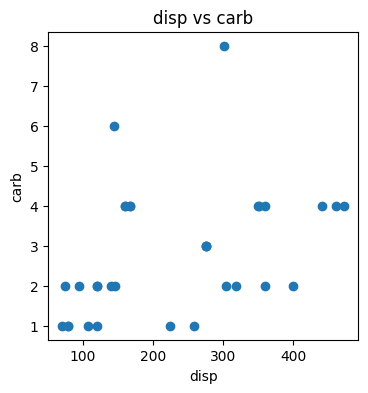

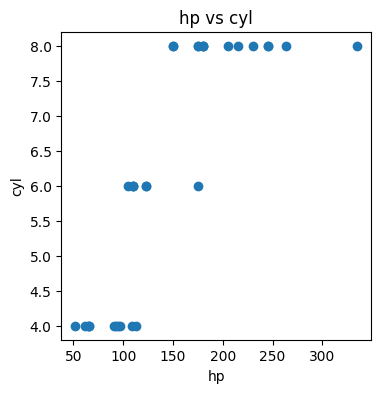

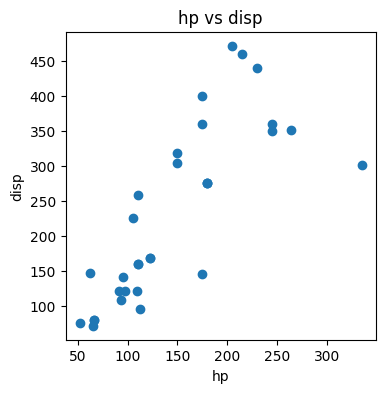

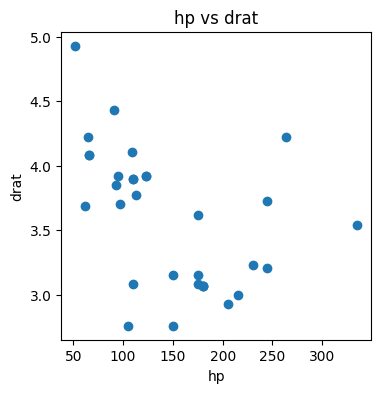

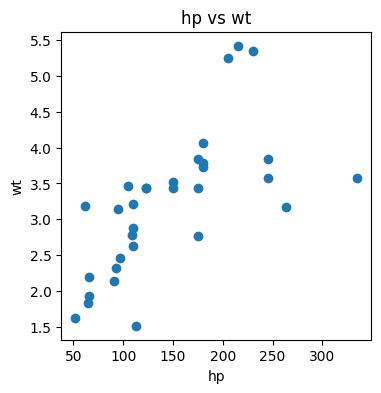

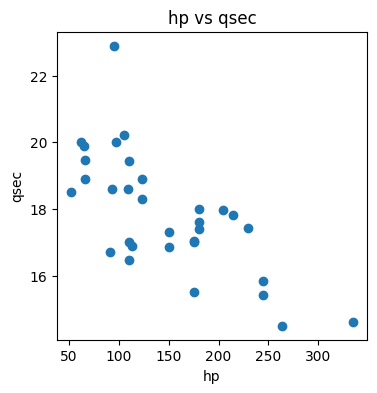

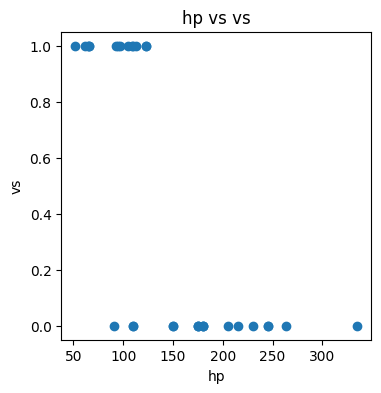

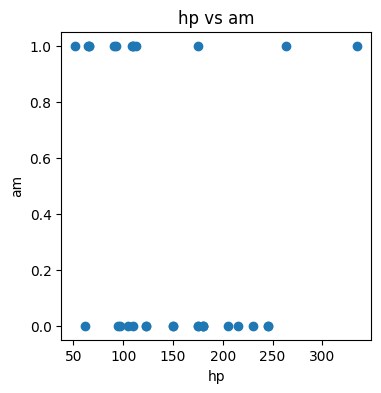

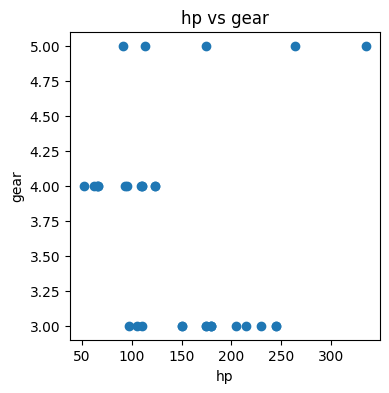

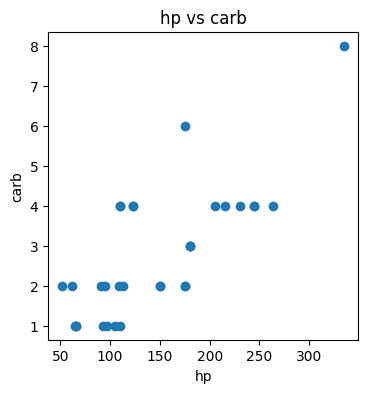

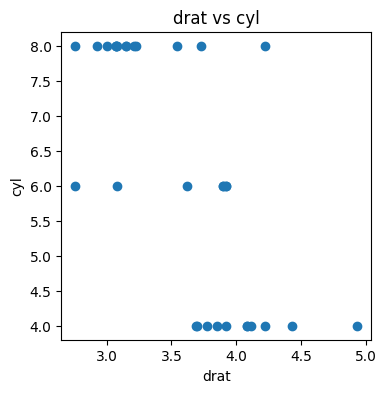

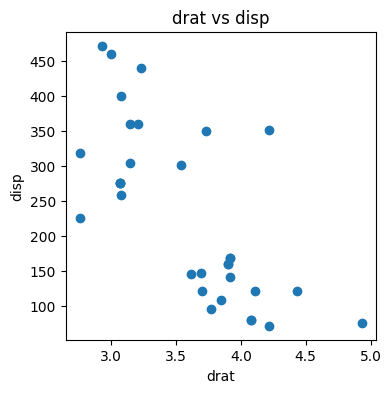

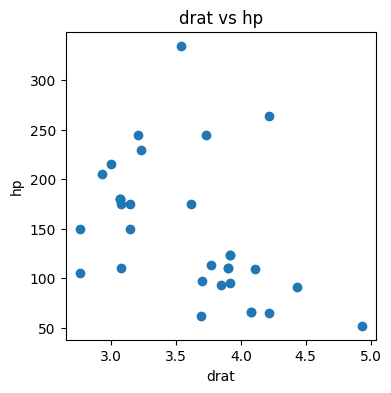

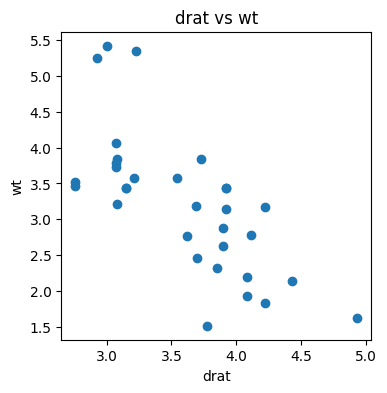

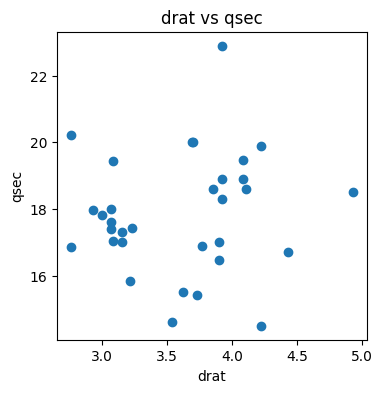

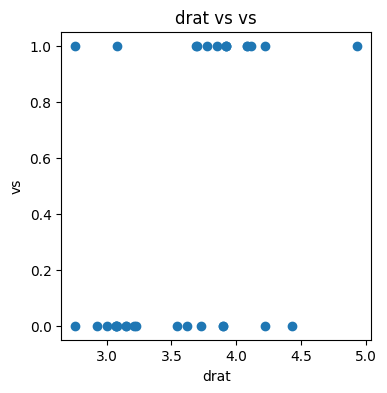

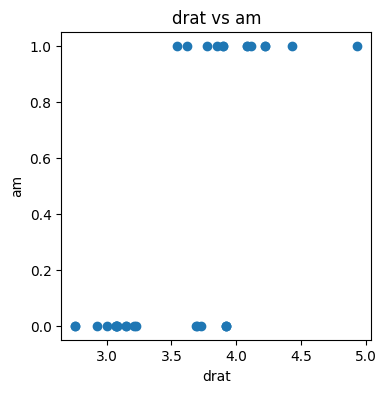

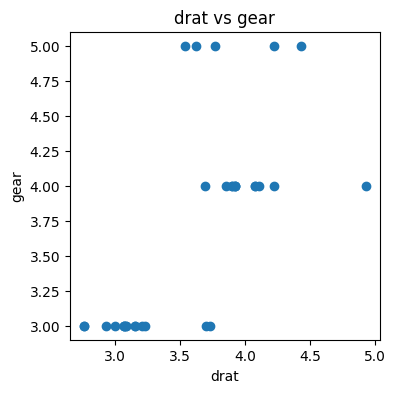

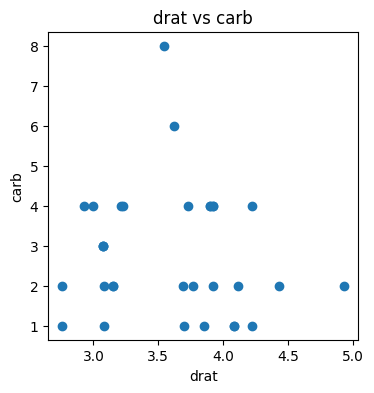

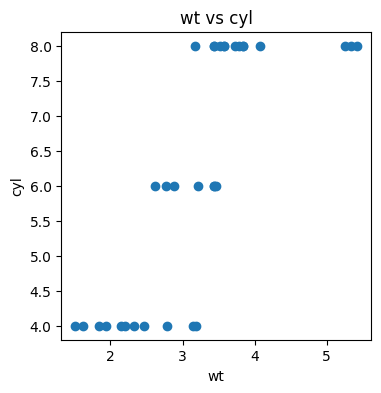

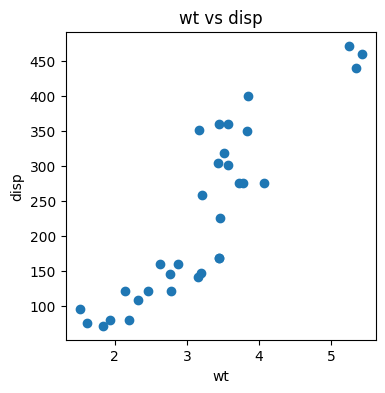

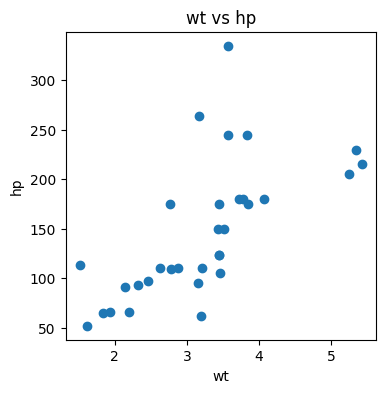

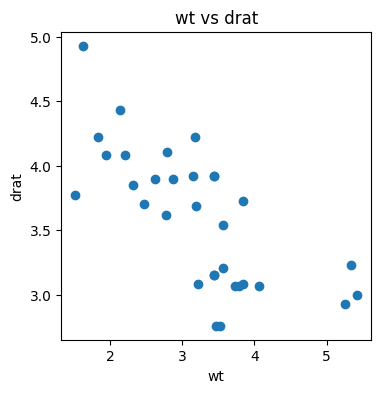

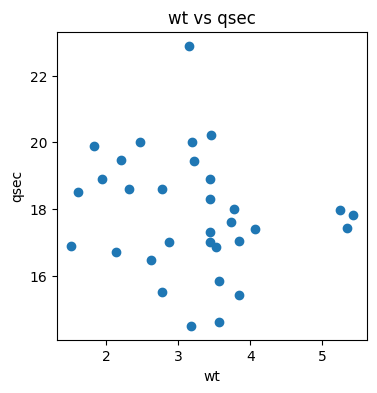

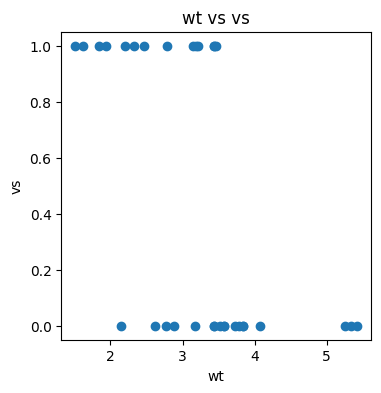

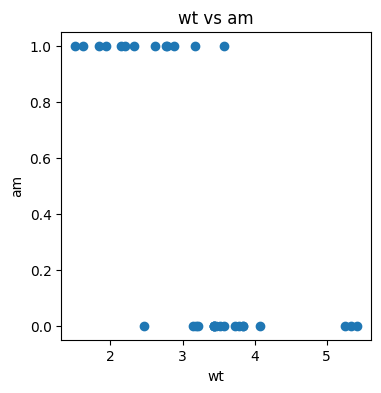

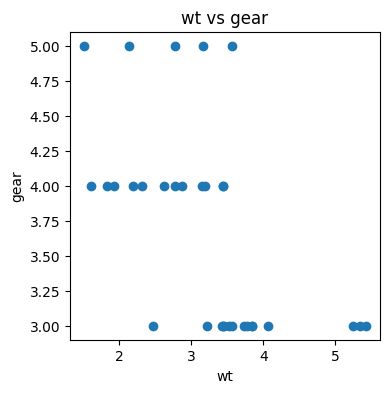

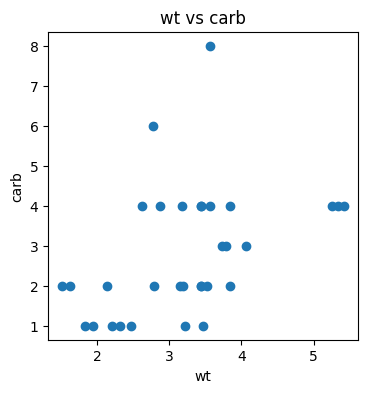

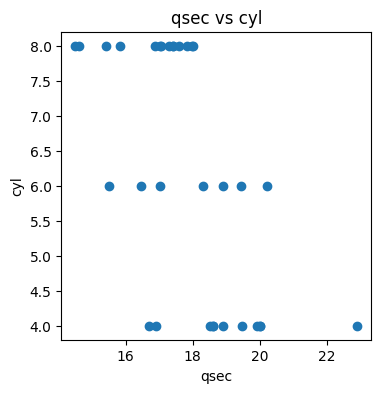

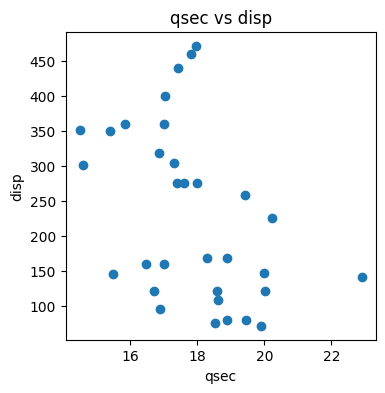

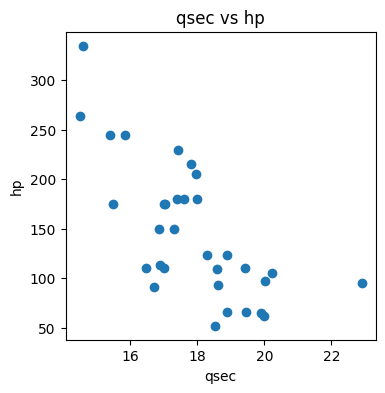

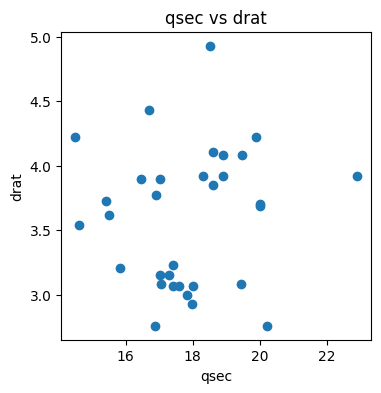

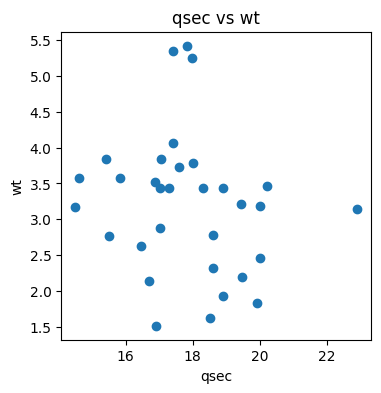

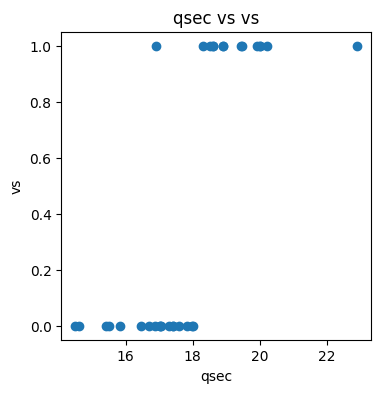

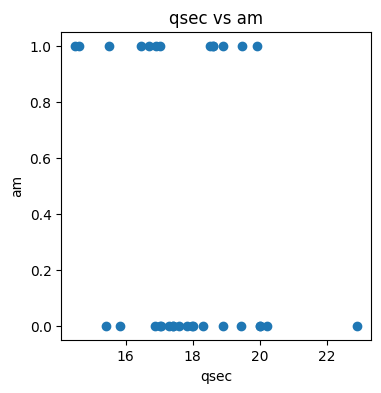

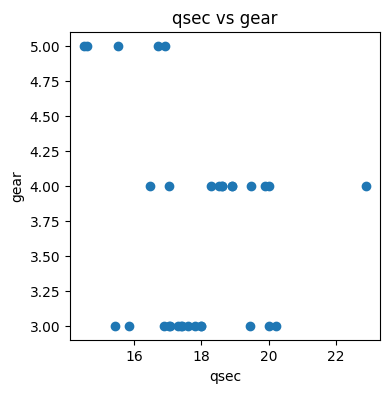

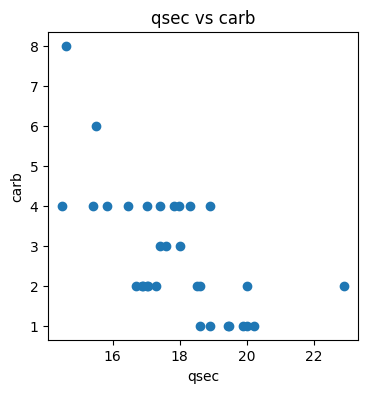

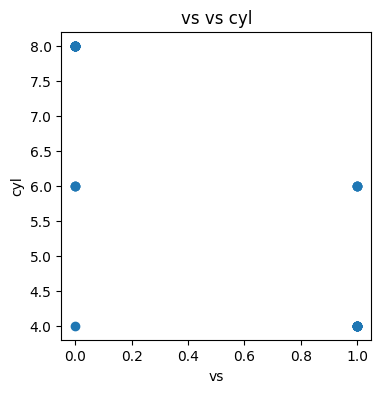

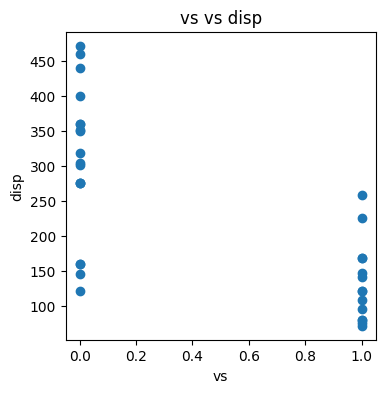

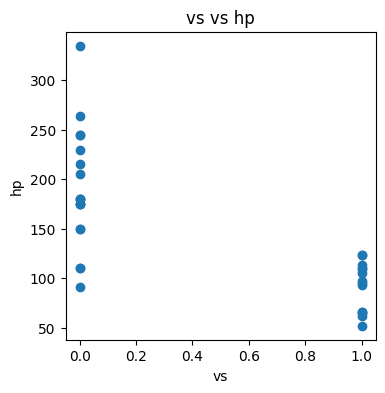

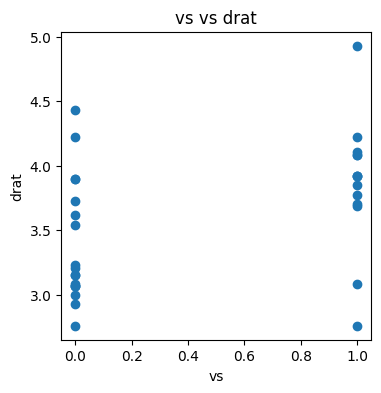

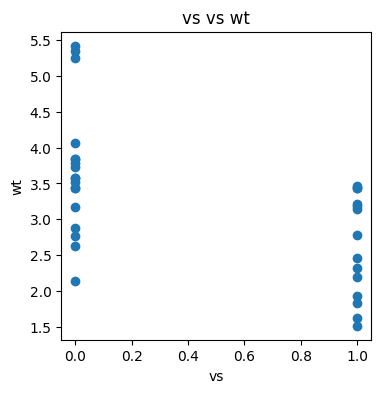

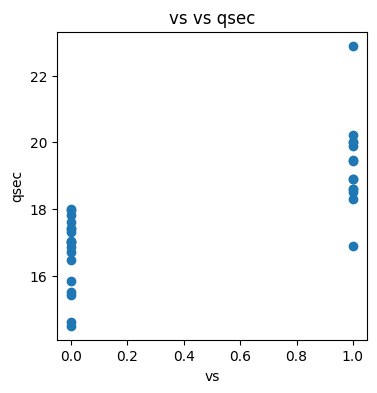

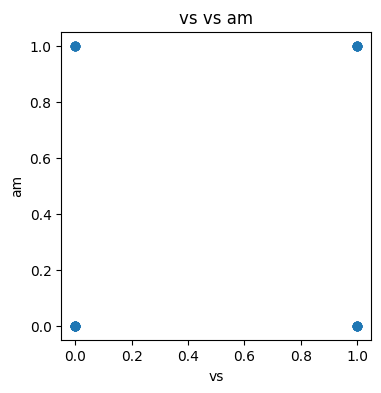

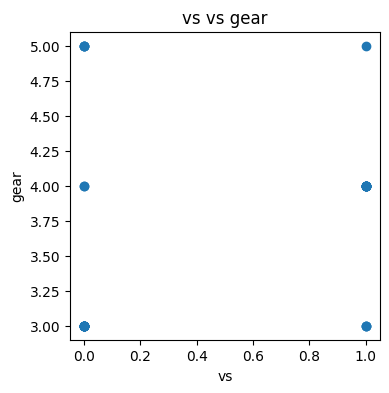

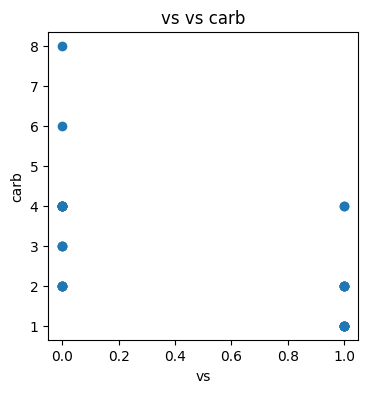

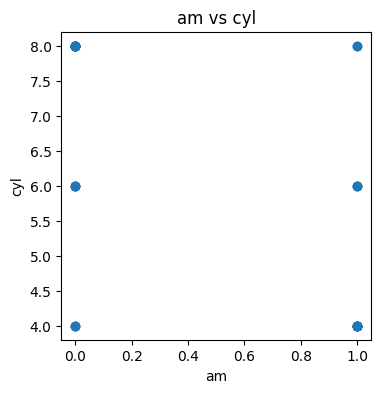

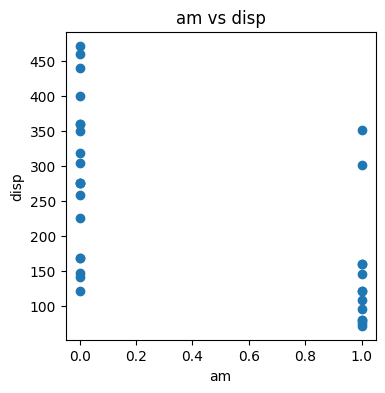

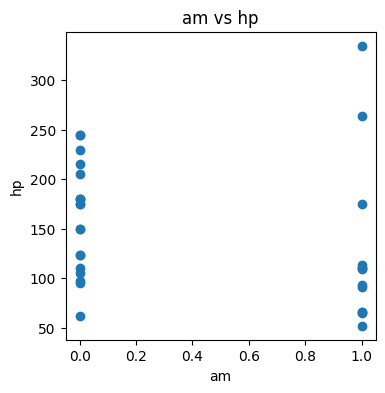

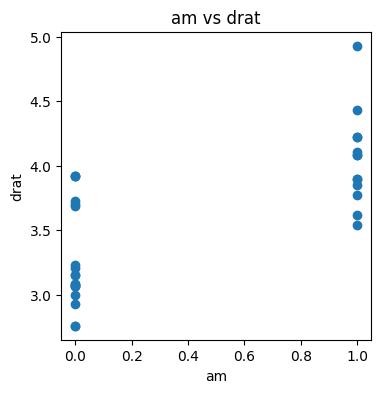

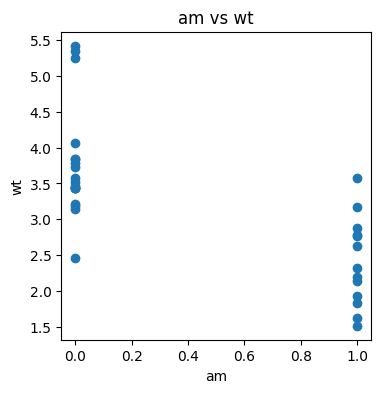

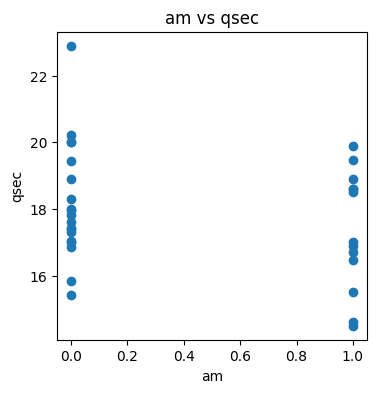

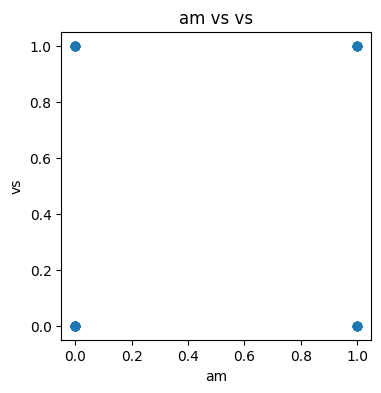

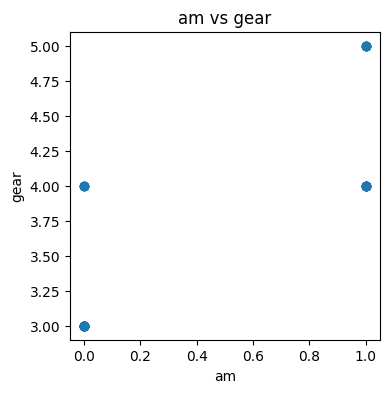

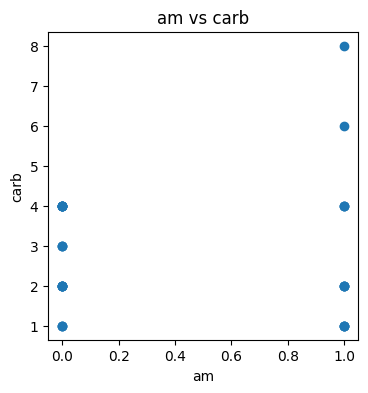

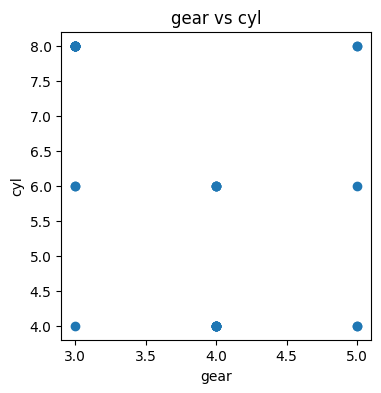

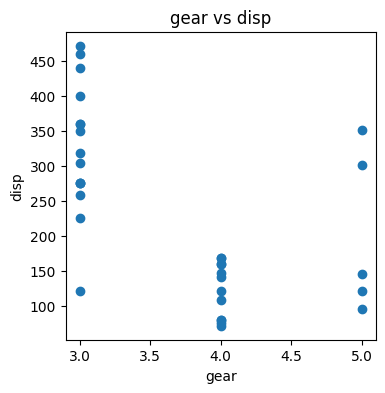

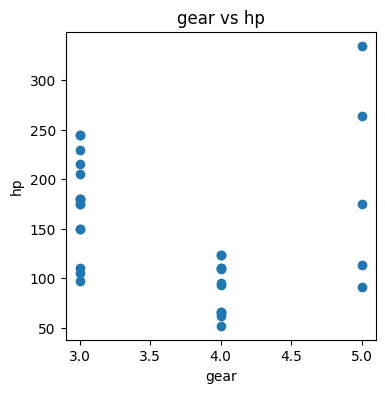

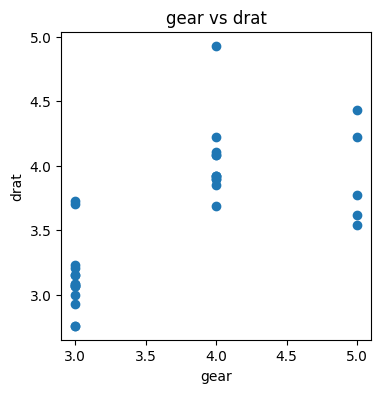

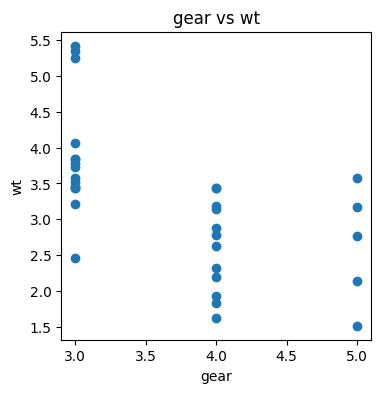

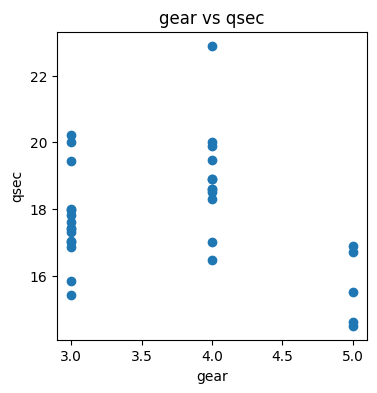

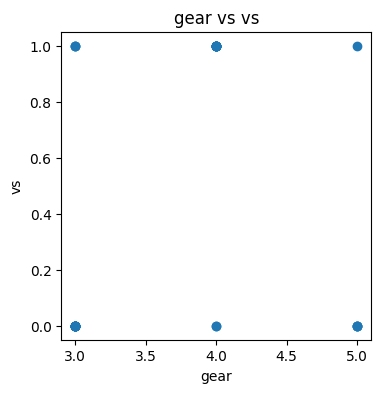

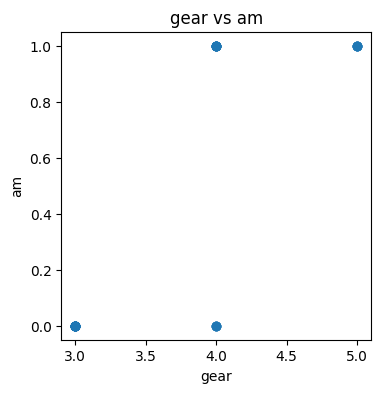

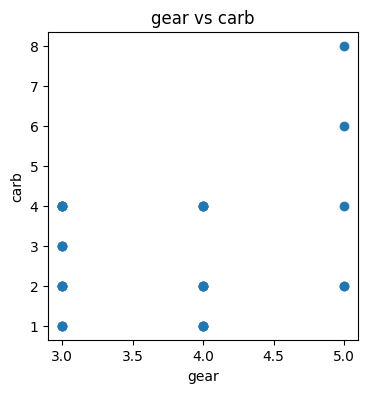

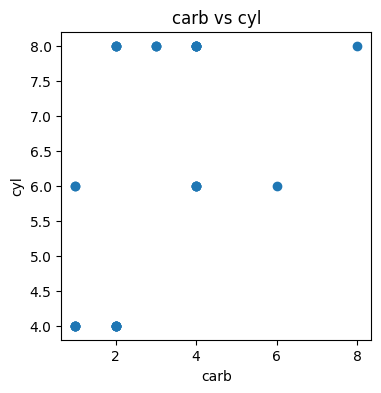

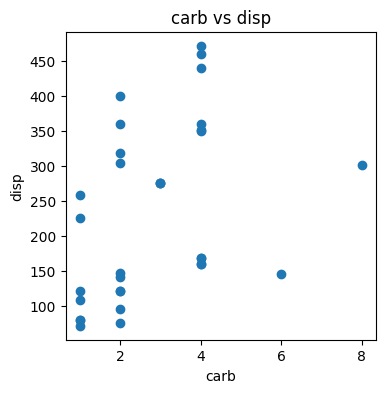

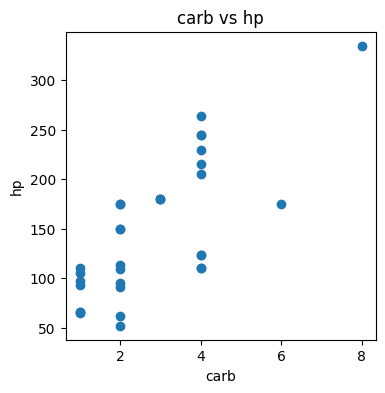

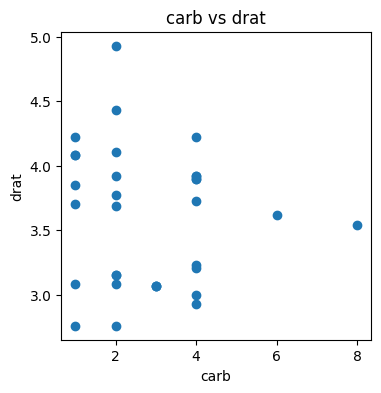

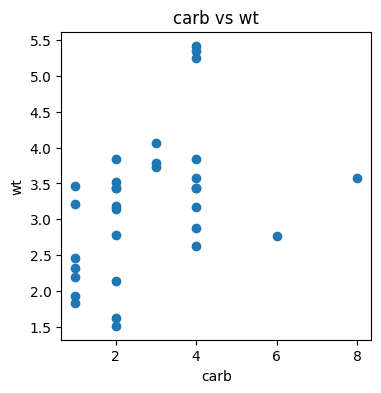

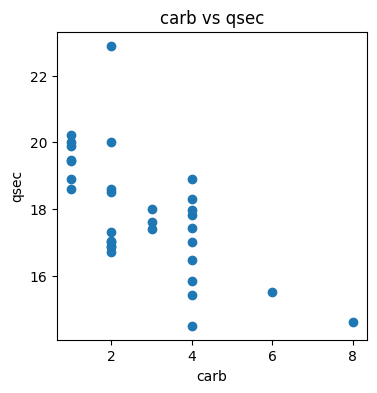

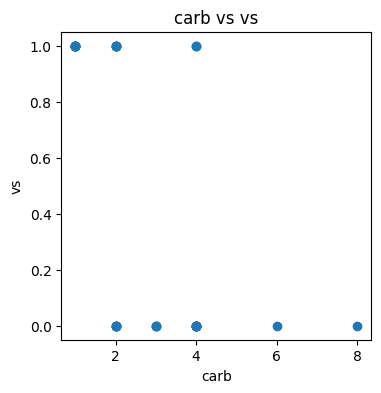

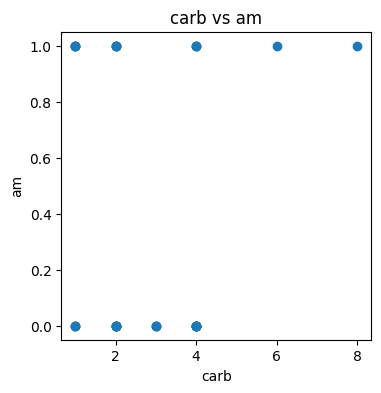

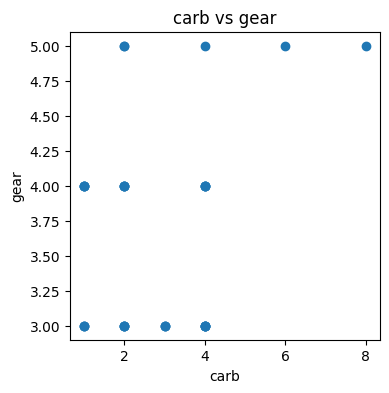

In [ ]:
# Check for collinearity using scatter diagrams
for feature in X.columns:
    X_new = X.drop([feature], axis=1)
    for feature2 in X_new.columns:
        plt.figure(figsize=(4, 4))
        plt.scatter(cars[feature], cars[feature2])
        plt.xlabel(feature)
        plt.ylabel(feature2)
        plt.title(f'{feature} vs {feature2}')
        plt.show()

In [ ]:
# Check for collinearity using pearson correlation coefficients
features = []
coefficients = []
p_values = []
for feature in X.columns:
    X_new = X.drop([feature], axis=1)
    for feature2 in X_new.columns:
        correlation_coefficient, p_value = pearsonr(X[feature], X[feature2])
        correlation_coefficient = round(correlation_coefficient, 3)
        p_value = round(p_value, 3)
        features.append(feature + ' vs ' + feature2)
        coefficients.append(correlation_coefficient)
        p_values.append(p_value)

In [ ]:
cor_df = pd.DataFrame({'Feature':features, 'Coefficient':coefficients, 'P-Value':p_values})
cor_df[(cor_df['P-Value'] < 0.05) & (cor_df['Coefficient'] > 0.9)].sort_values('Coefficient', ascending=False)

,Feature,Coefficient,P-Value
0,cyl vs disp,0.902,0.0
9,disp vs cyl,0.902,0.0


In [ ]:
cor_df[(cor_df['P-Value'] < 0.05) & (cor_df['Coefficient'] < -0.9)].sort_values('Coefficient')

,Feature,Coefficient,P-Value


There is collinearity between number of cylinders and displacement indicated by a significant Pearson correlation coefficient absolute value exceeding 0.9.

But which of the two features should we remove? That will be determined using the variance inflation factor later on in the notebook.

Statsmodels provides output that offers much more information than scikit-learn, so we shall use it here instead.

In [ ]:
# Select features by constructing a formula string indicating the outcome and features to use in the model.
formula_str = cars.columns[0]+' ~ '+'+'.join(cars.columns[1:])
formula_str

'mpg ~ cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb'

In [ ]:
# Create a model object using the formula string and the data to use.
cars_lm=smf.ols(formula=formula_str, data=cars)

In [ ]:
# Fit model to data
cars_lm = cars_lm.fit()

In [ ]:
# Show model output
print(cars_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           3.79e-07
Time:                        15:59:56   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [ ]:
# Statsmodels takes data as a dataframe with predictors and outcome combined. So, we need to combine X_train and y_train into a single dataframe.
cars_training = pd.concat([X_train, y_train], axis=1)
cars_training.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
model,,,,,,,,,,,
Ford Pantera L,8,351.0,264,4.22,3.170,14.50,0,1,5,4,15.8
Toyota Corolla,4,71.1,65,4.22,1.835,19.90,1,1,4,1,33.9
Cadillac Fleetwood,8,472.0,205,2.93,5.250,17.98,0,0,3,4,10.4
Pontiac Firebird,8,400.0,175,3.08,3.845,17.05,0,0,3,2,19.2
Merc 280C,6,167.6,123,3.92,3.440,18.90,1,0,4,4,17.8


In [ ]:
# Create a model object using the formula string and the training data.
cars_training_lm=smf.ols(formula=formula_str, data=cars_training)

In [ ]:
# Fit model to training data
cars_training_lm = cars_training_lm.fit()

In [ ]:
# Show model output
print(cars_training_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     8.432
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           0.000230
Time:                        16:04:01   Log-Likelihood:                -51.954
No. Observations:                  25   AIC:                             125.9
Df Residuals:                      14   BIC:                             139.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4653     20.824      0.407      0.6